In [1]:
import numpy as np
import pandas as pd
import requests as rq
from bs4 import BeautifulSoup
from tqdm.auto import tqdm
import time
from random import randint

tqdm.pandas()

# Парсер 

In [117]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys


def parse_press_links(links_url):
    page = rq.get(links_url).text

    soup = BeautifulSoup(page, 'html.parser')
    data = soup.findAll('div', {'class': 'info col-md-15'})
    if not data:
        print(links_url)
    links=[]
    for i in data:
        sub_page = i.find('a')
        if not sub_page:
            continue
        if 'пресс-релиз' in str(sub_page.text).lower():
            link = 'https://cbr.ru' + sub_page['href']
            links.append(link)
    return links

In [118]:
def get_link_text(link):
    page = rq.get(link)
    
    soup = BeautifulSoup(page.text, 'html.parser')
    data = soup.find('div', {'class': 'landing-text'})
    all_text = data.find_all('p')
    link_text = ' '.join(i.text for i in all_text).replace('\xa0', ' ')
    return link_text


def get_link_text_df(link):
    links = parse_press_links(link)
    df_text = pd.DataFrame(columns=['link', 'text'])
    for i in links:
        df_text.loc[len(df_text)] = [i, get_link_text(i)]
        #time.sleep(randint(1, 3))
    return df_text

In [119]:
df = pd.DataFrame(columns=['link', 'text'])
for i in tqdm(range(1, 2)):
    links_url = f'https://cbr.ru/DKP/cal_mp/#t{i}'
    df = pd.concat([df, get_link_text_df(links_url)]).drop_duplicates(subset='link')
    print(i, len(df))

  0%|          | 0/1 [00:00<?, ?it/s]

1 45


In [120]:
df['date'] = df['link'].apply(lambda x: x.lower().replace('https://cbr.ru/press/pr/?file=', '').split('_')[0])
df

,link,text,date
0,https://cbr.ru/press/pr/?file=16022024_133000k...,Совет директоров Банка России 16 февраля 202...,16022024
1,https://cbr.ru/press/pr/?file=22032024_133000k...,Совет директоров Банка России 22 марта 2024 ...,22032024
2,https://cbr.ru/press/pr/?file=10022023_133000K...,Совет директоров Банка России 10 февраля 202...,10022023
3,https://cbr.ru/press/pr/?file=17032023_133000K...,Совет директоров Банка России 17 марта 2023 ...,17032023
4,https://cbr.ru/press/pr/?file=28042023_133000K...,Совет директоров Банка России 28 апреля 2023...,28042023
5,https://cbr.ru/press/pr/?file=09062023_133024K...,Совет директоров Банка России 9 июня 2023 го...,09062023
6,https://cbr.ru/press/pr/?file=21072023_133000K...,Совет директоров Банка России 21 июля 2023 г...,21072023
7,https://cbr.ru/press/pr/?file=15082023_103000K...,Совет директоров Банка России принял решение...,15082023
8,https://cbr.ru/press/pr/?file=15092023_133000K...,Совет директоров Банка России 15 сентября 20...,15092023
9,https://cbr.ru/press/pr/?file=27102023_133000k...,Совет директоров Банка России 27 октября 202...,27102023


In [121]:
def parse_old_press(link):
    page = rq.get(link).text

    soup = BeautifulSoup(page, 'html.parser')
    data = soup.findAll('tr')
    links = []
    for tr in data:
        press_release = tr.find('a')
        if press_release and press_release.text == 'пресс-релиза':
            print(press_release['href'])
            links.append('https://cbr.ru' + press_release['href'])
    return links
            
def get_old_links_df(links_url):
    df_text = pd.DataFrame(columns=['link', 'text'])
    for i in links_url:
        df_text.loc[len(df_text)] = [i, get_link_text(i)]
        #time.sleep(randint(1, 3))
    return df_text
        
df = pd.concat([df, get_old_links_df(parse_old_press(f'https://cbr.ru/DKP/cal_mp/#t1'))])

/press/PR/?file=09022018_133031keyrate2018-02-09T13_29_29.htm
/press/PR/?file=23032018_133000keyrate2018-03-23T13_20_35.htm
/press/PR/?file=27042018_133000key.htm
/press/PR/?file=15062018_133000key.htm
/press/PR/?file=27072018_133000key.htm
/press/PR/?file=14092018_133000Key.htm
/press/pr/?file=26102018_133000Key.htm
/press/PR/?file=14122018_133000Key.htm
/press/PR/?file=03022017_133002keyrate2017-02-03T13_09_54.htm
/press/PR/?file=24032017_132958keyrate2017-03-24T13_25_44.htm
/press/PR/?file=28042017_132959keyrate2017-04-28T13_17_20.htm
/press/PR/?file=16062017_133001keyrate2017-06-16T13_21_27.htm
/press/PR/?file=28072017_133214keyrate2017-07-28T13_23_30.htm
/press/pr/?file=15092017_1330140keyrate2017-09-15T13_22_03.htm
/press/PR/?file=27102017_133003keyrate2017-10-27T13_18_28.htm
/press/PR/?file=15122017_133000keyrate2017-12-15T13_25_57.htm
/press/PR/?file=29012016_133000keyrate2016-01-29T13_01_16.htm
/press/PR/?file=18032016_133000keyrate2016-03-18T13_21_21.htm
/press/PR/?file=29042

In [122]:
df

,link,text,date
0,https://cbr.ru/press/pr/?file=16022024_133000k...,Совет директоров Банка России 16 февраля 202...,16022024
1,https://cbr.ru/press/pr/?file=22032024_133000k...,Совет директоров Банка России 22 марта 2024 ...,22032024
2,https://cbr.ru/press/pr/?file=10022023_133000K...,Совет директоров Банка России 10 февраля 202...,10022023
3,https://cbr.ru/press/pr/?file=17032023_133000K...,Совет директоров Банка России 17 марта 2023 ...,17032023
4,https://cbr.ru/press/pr/?file=28042023_133000K...,Совет директоров Банка России 28 апреля 2023...,28042023
...,...,...,...
35,https://cbr.ru/press/PR/?file=16062014_133053d...,Совет директоров Банка России 16 июня 2014 год...,NaN
36,https://cbr.ru/press/PR/?file=25072014_133011d...,\nСовет директоров Банка России 25 июля 2014 г...,NaN
37,https://cbr.ru/press/PR/?file=12092014_133036d...,Совет директоров Банка России 12 сентября 2014...,NaN
38,https://cbr.ru/press/PR/?file=31102014_133027d...,Совет директоров Банка России 31 октября 2014 ...,NaN


In [123]:
df['date'] = df['link'].apply(lambda x: x.lower().replace('https://cbr.ru/press/pr/?file=', '').split('_')[0])
df

,link,text,date
0,https://cbr.ru/press/pr/?file=16022024_133000k...,Совет директоров Банка России 16 февраля 202...,16022024
1,https://cbr.ru/press/pr/?file=22032024_133000k...,Совет директоров Банка России 22 марта 2024 ...,22032024
2,https://cbr.ru/press/pr/?file=10022023_133000K...,Совет директоров Банка России 10 февраля 202...,10022023
3,https://cbr.ru/press/pr/?file=17032023_133000K...,Совет директоров Банка России 17 марта 2023 ...,17032023
4,https://cbr.ru/press/pr/?file=28042023_133000K...,Совет директоров Банка России 28 апреля 2023...,28042023
...,...,...,...
35,https://cbr.ru/press/PR/?file=16062014_133053d...,Совет директоров Банка России 16 июня 2014 год...,16062014
36,https://cbr.ru/press/PR/?file=25072014_133011d...,\nСовет директоров Банка России 25 июля 2014 г...,25072014
37,https://cbr.ru/press/PR/?file=12092014_133036d...,Совет директоров Банка России 12 сентября 2014...,12092014
38,https://cbr.ru/press/PR/?file=31102014_133027d...,Совет директоров Банка России 31 октября 2014 ...,31102014


In [27]:
df.to_csv('text_links.csv', index=False)

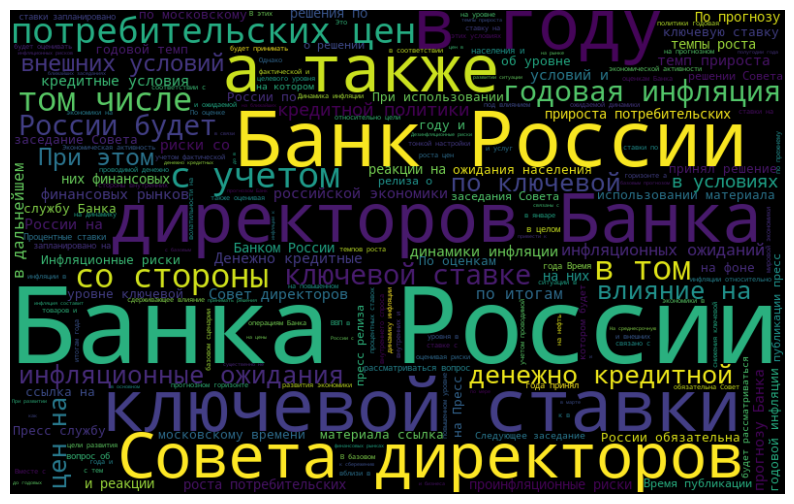

In [23]:
from pymystem3 import Mystem
import matplotlib.pyplot as plt

from wordcloud import WordCloud

normal_words =' '.join([text for text in df['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [4]:
def clean_text(text):
    import re
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from pymorphy3 import MorphAnalyzer

    morph = MorphAnalyzer(lang='ru')
    stop_words = set(stopwords.words('russian'))
    stop_words.update(
        ['совет', 'директоры', 'банк', 'россия', 'другой', 'это', 'ключевой ставка', 'директор'])
    text = re.sub('[^а-яёА-ЯЁ]', ' ', text)  # оставляем только кириллицу
    text = word_tokenize(
        text.lower(),
        language='russian')  # приводим к нижнему регистру и токенизируем по словам
    # приводим токены к нормальной форме, удаляем стоп-слова и короткие токены
    text_cleaned = []
    for token in text:
        token = token.lower().strip()
        t_clean = morph.normal_forms(token)[0]
        if len(t_clean) > 2 and (t_clean not in stop_words):
            text_cleaned.append(t_clean)
    text = " ".join(text_cleaned)  # возвращаем строку
    return text

In [59]:
df['cleaned'] = df['text'].progress_apply(lambda x:clean_text(x))
df

  0%|          | 0/85 [00:00<?, ?it/s]

,link,text,date,cleaned
0,https://cbr.ru/press/pr/?file=16022024_133000k...,Совет директоров Банка России 16 февраля 202...,16022024,россия февраль год принять решение сохранить к...
1,https://cbr.ru/press/pr/?file=22032024_133000k...,Совет директоров Банка России 22 марта 2024 ...,22032024,россия март год принять решение сохранить ключ...
2,https://cbr.ru/press/pr/?file=10022023_133000K...,Совет директоров Банка России 10 февраля 202...,10022023,россия февраль год принять решение сохранить к...
3,https://cbr.ru/press/pr/?file=17032023_133000K...,Совет директоров Банка России 17 марта 2023 ...,17032023,россия март год принять решение сохранить ключ...
4,https://cbr.ru/press/pr/?file=28042023_133000K...,Совет директоров Банка России 28 апреля 2023...,28042023,россия апрель год принять решение сохранить кл...
...,...,...,...,...
35,https://cbr.ru/press/PR/?file=16062014_133053d...,Совет директоров Банка России 16 июня 2014 год...,16062014,россия июнь год принять решение сохранить ключ...
36,https://cbr.ru/press/PR/?file=25072014_133011d...,\nСовет директоров Банка России 25 июля 2014 г...,25072014,россия июль год принять решение повысить ключе...
37,https://cbr.ru/press/PR/?file=12092014_133036d...,Совет директоров Банка России 12 сентября 2014...,12092014,россия сентябрь год принять решение сохранить ...
38,https://cbr.ru/press/PR/?file=31102014_133027d...,Совет директоров Банка России 31 октября 2014 ...,31102014,россия октябрь год принять решение повысить кл...


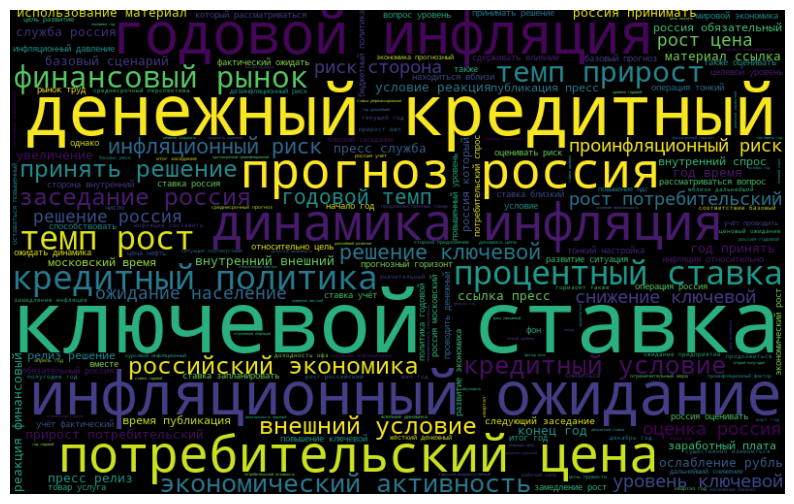

In [60]:
normal_words = ' '.join([text for text in df['cleaned']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [112]:
df = pd.read_csv('text_links.csv')
df['date'] = df['date']

In [115]:
df

,link,text,date
0,https://cbr.ru/press/pr/?file=16022024_133000k...,Совет директоров Банка России 16 февраля 202...,16022024
1,https://cbr.ru/press/pr/?file=22032024_133000k...,Совет директоров Банка России 22 марта 2024 ...,22032024
2,https://cbr.ru/press/pr/?file=10022023_133000K...,Совет директоров Банка России 10 февраля 202...,10022023
3,https://cbr.ru/press/pr/?file=17032023_133000K...,Совет директоров Банка России 17 марта 2023 ...,17032023
4,https://cbr.ru/press/pr/?file=28042023_133000K...,Совет директоров Банка России 28 апреля 2023...,28042023
...,...,...,...
80,https://cbr.ru/press/PR/?file=16062014_133053d...,Совет директоров Банка России 16 июня 2014 год...,16062014
81,https://cbr.ru/press/PR/?file=25072014_133011d...,\nСовет директоров Банка России 25 июля 2014 г...,25072014
82,https://cbr.ru/press/PR/?file=12092014_133036d...,Совет директоров Банка России 12 сентября 2014...,12092014
83,https://cbr.ru/press/PR/?file=31102014_133027d...,Совет директоров Банка России 31 октября 2014 ...,31102014


In [124]:
rates_df = pd.read_csv('key_rate.csv')
rates_df['date'] = rates_df['Дата'].apply(lambda x: x.replace('.', '')).astype(str)
rates_df = rates_df.drop(['Unnamed: 0', 'Дата'], axis=1)
rates_df

,Ставка,date
0,16.0,08042024
1,16.0,05042024
2,16.0,04042024
3,16.0,03042024
4,16.0,02042024
...,...,...
2632,5.5,23092013
2633,5.5,20092013
2634,5.5,19092013
2635,5.5,18092013


In [125]:
total_df = df.merge(rates_df, how='left', on='date')
total_df

,link,text,date,Ставка
0,https://cbr.ru/press/pr/?file=16022024_133000k...,Совет директоров Банка России 16 февраля 202...,16022024,16.0
1,https://cbr.ru/press/pr/?file=22032024_133000k...,Совет директоров Банка России 22 марта 2024 ...,22032024,16.0
2,https://cbr.ru/press/pr/?file=10022023_133000K...,Совет директоров Банка России 10 февраля 202...,10022023,7.5
3,https://cbr.ru/press/pr/?file=17032023_133000K...,Совет директоров Банка России 17 марта 2023 ...,17032023,7.5
4,https://cbr.ru/press/pr/?file=28042023_133000K...,Совет директоров Банка России 28 апреля 2023...,28042023,7.5
...,...,...,...,...
80,https://cbr.ru/press/PR/?file=16062014_133053d...,Совет директоров Банка России 16 июня 2014 год...,16062014,7.5
81,https://cbr.ru/press/PR/?file=25072014_133011d...,\nСовет директоров Банка России 25 июля 2014 г...,25072014,7.5
82,https://cbr.ru/press/PR/?file=12092014_133036d...,Совет директоров Банка России 12 сентября 2014...,12092014,8.0
83,https://cbr.ru/press/PR/?file=31102014_133027d...,Совет директоров Банка России 31 октября 2014 ...,31102014,8.0


In [126]:
total_df['date'] = pd.to_datetime(total_df['date'], format="%d%m%Y")

In [127]:
total_df = total_df.sort_values('date', ascending=False)

In [130]:
def count_target(x):
    if x['future'] > x['Ставка']: return 1
    if x['future'] == x['Ставка']: return 0
    if x['future'] < x['Ставка']: return -1

In [131]:
total_df['future'] = total_df['Ставка'].shift(1)
total_df['target'] = total_df.apply(lambda x: count_target(x), axis=1)
total_df

,link,text,date,Ставка,future,target
1,https://cbr.ru/press/pr/?file=22032024_133000k...,Совет директоров Банка России 22 марта 2024 ...,2024-03-22,16.0,NaN,NaN
0,https://cbr.ru/press/pr/?file=16022024_133000k...,Совет директоров Банка России 16 февраля 202...,2024-02-16,16.0,16.0,0.0
10,https://cbr.ru/press/pr/?file=15122023_133000k...,Совет директоров Банка России 15 декабря 202...,2023-12-15,15.0,16.0,1.0
9,https://cbr.ru/press/pr/?file=27102023_133000k...,Совет директоров Банка России 27 октября 202...,2023-10-27,13.0,15.0,1.0
8,https://cbr.ru/press/pr/?file=15092023_133000K...,Совет директоров Банка России 15 сентября 20...,2023-09-15,12.0,13.0,1.0
...,...,...,...,...,...,...
81,https://cbr.ru/press/PR/?file=25072014_133011d...,\nСовет директоров Банка России 25 июля 2014 г...,2014-07-25,7.5,8.0,1.0
80,https://cbr.ru/press/PR/?file=16062014_133053d...,Совет директоров Банка России 16 июня 2014 год...,2014-06-16,7.5,7.5,0.0
79,https://cbr.ru/press/PR/?file=25042014_1330501...,\nСовет директоров Банка России 25 апреля 2014...,2014-04-25,7.0,7.5,1.0
78,https://cbr.ru/press/PR/?file=14032014_1330144...,Совет директоров Банка России 14 марта 2014 го...,2014-03-14,7.0,7.0,0.0


In [132]:
total_df.to_csv('target.csv', index=False)

In [2]:
total_df = pd.read_csv('target.csv')

In [5]:
total_df['cleaned'] = total_df['text'].progress_apply(clean_text)

  0%|          | 0/85 [00:00<?, ?it/s]

In [141]:
total_df

,link,text,date,Ставка,future,target,cleaned
1,https://cbr.ru/press/pr/?file=22032024_133000k...,Совет директоров Банка России 22 марта 2024 ...,2024-03-22,16.0,NaN,NaN,март год принять решение сохранить ключевой ст...
0,https://cbr.ru/press/pr/?file=16022024_133000k...,Совет директоров Банка России 16 февраля 202...,2024-02-16,16.0,16.0,0.0,февраль год принять решение сохранить ключевой...
10,https://cbr.ru/press/pr/?file=15122023_133000k...,Совет директоров Банка России 15 декабря 202...,2023-12-15,15.0,16.0,1.0,декабрь год принять решение повысить ключевой ...
9,https://cbr.ru/press/pr/?file=27102023_133000k...,Совет директоров Банка России 27 октября 202...,2023-10-27,13.0,15.0,1.0,октябрь год принять решение повысить ключевой ...
8,https://cbr.ru/press/pr/?file=15092023_133000K...,Совет директоров Банка России 15 сентября 20...,2023-09-15,12.0,13.0,1.0,сентябрь год принять решение повысить ключевой...
...,...,...,...,...,...,...,...
81,https://cbr.ru/press/PR/?file=25072014_133011d...,\nСовет директоров Банка России 25 июля 2014 г...,2014-07-25,7.5,8.0,1.0,июль год принять решение повысить ключевой ста...
80,https://cbr.ru/press/PR/?file=16062014_133053d...,Совет директоров Банка России 16 июня 2014 год...,2014-06-16,7.5,7.5,0.0,июнь год принять решение сохранить ключевой ст...
79,https://cbr.ru/press/PR/?file=25042014_1330501...,\nСовет директоров Банка России 25 апреля 2014...,2014-04-25,7.0,7.5,1.0,апрель год принять решение повысить ключевой с...
78,https://cbr.ru/press/PR/?file=14032014_1330144...,Совет директоров Банка России 14 марта 2014 го...,2014-03-14,7.0,7.0,0.0,март год принять решение оставить ключевой ста...


In [6]:
from sklearn.model_selection import train_test_split
total_df = total_df.dropna()
x_train, x_test, y_train, y_test = train_test_split(total_df["cleaned"],total_df['target'], test_size = 0.4, random_state = 42, stratify=total_df['target'])


In [7]:
y_train.value_counts()

target
 0.0    21
-1.0    18
 1.0    11
Name: count, dtype: int64

In [8]:
y_test.value_counts()

target
 0.0    14
-1.0    12
 1.0     8
Name: count, dtype: int64

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer(min_df=0.2, max_df=0.9, ngram_range=(2, 3))
x_train_bow = cnt_vec.fit_transform(x_train)
x_test_bow = cnt_vec.transform(x_test)
x_train_bow

<50x502 sparse matrix of type '<class 'numpy.int64'>'
	with 8311 stored elements in Compressed Sparse Row format>

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report

from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
x_train_bow = scaler.fit_transform(x_train_bow)
x_test_bow = scaler.transform(x_test_bow)

In [11]:
lr_bow = LogisticRegression()
lr_bow.fit(x_train_bow, y_train)
pred_bow = lr_bow.predict(x_test_bow)
print(classification_report(y_test, pred_bow))

              precision    recall  f1-score   support

        -1.0       0.92      1.00      0.96        12
         0.0       0.72      0.93      0.81        14
         1.0       1.00      0.38      0.55         8

    accuracy                           0.82        34
   macro avg       0.88      0.77      0.77        34
weighted avg       0.86      0.82      0.80        34


In [12]:
print(y_test.to_list())
print(pred_bow)

[-1.0, -1.0, 0.0, 0.0, 1.0, 0.0, -1.0, 0.0, 0.0, -1.0, -1.0, 1.0, 0.0, 0.0, 0.0, -1.0, -1.0, 0.0, 1.0, -1.0, -1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, -1.0, 1.0, -1.0, -1.0, 1.0, 0.0, 0.0]
[-1. -1.  0.  0.  0.  0. -1.  0.  0. -1. -1.  1.  0.  0.  0. -1. -1.  0.
  1. -1. -1.  0.  1.  0.  0.  0.  0. -1.  0. -1. -1.  0.  0. -1.]


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=0.3, max_df=0.8, ngram_range=(3, 3))
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)
print(x_train_tfidf.shape)
lr_tfidf = LogisticRegression()
lr_tfidf.fit(x_train_tfidf, y_train)
pred_tfidf = lr_tfidf.predict(x_test_tfidf)
print(classification_report(y_test, pred_tfidf))

(50, 77)
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        12
         0.0       0.74      1.00      0.85        14
         1.0       1.00      0.38      0.55         8

    accuracy                           0.85        34
   macro avg       0.91      0.79      0.80        34
weighted avg       0.89      0.85      0.83        34


In [14]:
from catboost import CatBoostClassifier


model = CatBoostClassifier(depth=16)
model.fit(x_train_tfidf, y_train)
pred_cat = model.predict(x_test_tfidf)
print(classification_report(y_test, pred_cat))

Learning rate set to 0.067916
0:	learn: 1.0353032	total: 140ms	remaining: 2m 19s
1:	learn: 1.0113558	total: 146ms	remaining: 1m 12s
2:	learn: 0.9860287	total: 165ms	remaining: 54.7s
3:	learn: 0.9696107	total: 181ms	remaining: 45s
4:	learn: 0.9366147	total: 184ms	remaining: 36.6s
5:	learn: 0.9225184	total: 269ms	remaining: 44.5s
6:	learn: 0.9073943	total: 287ms	remaining: 40.8s
7:	learn: 0.8960018	total: 1.35s	remaining: 2m 47s
8:	learn: 0.8818308	total: 1.6s	remaining: 2m 56s
9:	learn: 0.8697421	total: 10.3s	remaining: 17m 3s
10:	learn: 0.8519365	total: 10.5s	remaining: 15m 44s
11:	learn: 0.8334086	total: 10.6s	remaining: 14m 33s
12:	learn: 0.8170941	total: 10.6s	remaining: 13m 27s
13:	learn: 0.8017777	total: 10.7s	remaining: 12m 32s
14:	learn: 0.7860323	total: 10.7s	remaining: 11m 42s
15:	learn: 0.7720074	total: 10.7s	remaining: 10m 58s
16:	learn: 0.7585091	total: 10.8s	remaining: 10m 21s
17:	learn: 0.7429678	total: 10.8s	remaining: 9m 48s
18:	learn: 0.7325043	total: 11.2s	remaining: 

In [15]:
print(y_test)
print(pred_bow)

76   -1.0
15   -1.0
49    0.0
62    0.0
4     1.0
48    0.0
33   -1.0
60    0.0
69    0.0
55   -1.0
73   -1.0
77    1.0
79    0.0
43    0.0
68    0.0
32   -1.0
41   -1.0
30    0.0
47    1.0
37   -1.0
57   -1.0
67    0.0
23    1.0
6     1.0
3     1.0
9     0.0
7     0.0
54   -1.0
2     1.0
72   -1.0
58   -1.0
84    1.0
71    0.0
42    0.0
Name: target, dtype: float64
[-1. -1.  0.  0.  0.  0. -1.  0.  0. -1. -1.  1.  0.  0.  0. -1. -1.  0.
  1. -1. -1.  0.  1.  0.  0.  0.  0. -1.  0. -1. -1.  0.  0. -1.]


In [16]:
import pickle

pickle.dump(model, open('catBoost_tfidf.pkl', 'wb'))